<a href="https://colab.research.google.com/github/paulabhishek7777/UNP-C2C/blob/main/The_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing required libraries
%matplotlib inline
import pandas  as pd
import seaborn as sn
import numpy as np
import sklearn
import matplotlib.pyplot as plt 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("/content/drive/MyDrive/UNP C2C Assign 1 /Titanic.csv")

In [5]:
df

,PassengerId,Pclass,Gender,Age,SibSp,Embarked,Survived
0,1,3,male,22.0,1,S,0
1,2,1,female,38.0,1,C,1
2,3,3,female,26.0,0,S,1
3,4,1,female,35.0,1,S,1
4,5,3,male,35.0,0,S,0
...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,S,0
887,888,1,female,19.0,0,S,1
888,889,3,female,NaN,1,S,0
889,890,1,male,26.0,0,C,1


In [ ]:
df.isnull().sum()
#177 missing values in age
#2 missing values in embarked

In [6]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,3.000000,38.000000,1.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,1.000000


In [7]:
df["Age"].median()

28.0

In [8]:
df['Age'].fillna(value=df.Age.median(), inplace = True)

In [9]:
df.isnull().sum()

PassengerId    0
Pclass         0
Gender         0
Age            0
SibSp          0
Embarked       2
Survived       0
dtype: int64

In [11]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
#s has the higher frequency therefore we may assume that we can replace missing values with s

In [13]:
df['Embarked'].fillna(value = 'S' ,inplace = True)

In [14]:
df.isnull().sum()
# all missing values are cleared

PassengerId    0
Pclass         0
Gender         0
Age            0
SibSp          0
Embarked       0
Survived       0
dtype: int64

importing required libraries to perform decision tree and random forest

In [15]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [16]:
Embarked_number = {"Embarked" : {"C" : 0, "S" : 1 , "Q" : 2}}
Gender_number = {"Gender" : {"male" : 0, "female" : 1}}

In [17]:
df = df.replace(Embarked_number)

In [18]:
df = df.replace(Gender_number)

In [19]:
df

,PassengerId,Pclass,Gender,Age,SibSp,Embarked,Survived
0,1,3,0,22.0,1,1,0
1,2,1,1,38.0,1,0,1
2,3,3,1,26.0,0,1,1
3,4,1,1,35.0,1,1,1
4,5,3,0,35.0,0,1,0
...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,1,0
887,888,1,1,19.0,0,1,1
888,889,3,1,28.0,1,1,0
889,890,1,0,26.0,0,0,1


In [20]:
x=df.iloc[:,0:5]
y=df.iloc[:,5:6]


In [21]:
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.2)

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 5)
(712, 1)
(179, 5)
(179, 1)


In [23]:
dt=DecisionTreeClassifier(max_depth=8, min_samples_split=8, max_leaf_nodes=20)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=20, min_samples_split=8)

In [24]:
y_pred = dt.predict(x_test)

In [25]:
print(classification_report(y_test, y_pred))
print('*'*55)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.11      0.19        35
           1       0.76      0.97      0.85       127
           2       0.67      0.35      0.46        17

    accuracy                           0.74       179
   macro avg       0.64      0.48      0.50       179
weighted avg       0.70      0.74      0.68       179

*******************************************************
[[  4  28   3]
 [  4 123   0]
 [  0  11   6]]


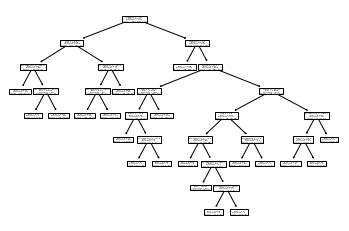

In [28]:
plot_tree(dt,feature_names=["PassengerId","Gender","Age","Sibsb","Embarked"])
plt.savefig('out.pdf')

In [27]:
rf=RandomForestClassifier(n_estimators=10, max_depth=5, min_samples_split=2, max_leaf_nodes=7)
rf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=5, max_leaf_nodes=7, n_estimators=10)

In [29]:
y_pred1=rf.predict(x_test)

In [32]:
print(classification_report(y_test, y_pred1))
print('*'*60)
print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.71      0.98      0.82       127
           2       0.00      0.00      0.00        17

    accuracy                           0.70       179
   macro avg       0.24      0.33      0.27       179
weighted avg       0.50      0.70      0.58       179

************************************************************
[[  0  35   0]
 [  2 125   0]
 [  0  17   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


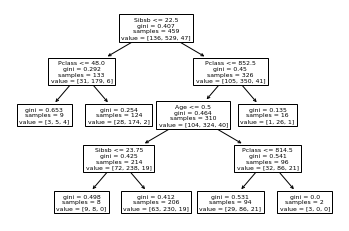

In [31]:
plot_tree(rf.estimators_[0],feature_names=["Pclass","Gender","Age","Sibsb","Embarked"])
plt.savefig('out1.pdf')